### Class Exercise - the Classic "Traveling Salesperson" Problem

Find the shortest route which visits a set of N locations 

![Traveling Salesperson](512px-GLPK_solution_of_a_travelling_salesman_problem.svg.png "Traveling Salesperson")


Example applications: 
   * shortest route to fly between N cities
   * shortest route for postal worker to deliver to N houses
   * shortest route to pick up your N friends in a bus
   * shortest route to visit N tourist attractions in a city
   
This is a classic problem for computer scientists and computational physicists alike. 

Set up the problem as follows: 

1. Denote the position of location i with a 2D vector, $r_i = (x_i, y_i)$. 
2. Randomly select $N$ positions, $r_i$ (start with a small value of $N$)
3. Make a plot of the $N$ locations
4. Start by visiting the locations in the order you set them up, calculating the total distance travelled as 

$$ D = \sum^{N-1}_{i=0} | \bf{r}_{i+1} - \bf{r}_i | $$

Run the simulation: 

Now use an MCMC with Simulated Annealing to find the shorted route. 

In (hopefully) plain English: 
  1. Swap two randomly selected cities
  2. If the swap shortens the tour keep it, if not keep it with the Metropolis probability for a "temperature" T and an "energy" $E = D$ (ie. keep if the probability, P is 
  
  $$ P \lt e^{\Delta D/T}$$
  
for some value of $T$ you have chosen.
  3. Now reduce $T$ to simulate annealing according to your "cooling schedule" $ T = T_0 e^{-t/\tau}$ (you have to pick a value of $\tau$ and $t$ for your time step also). 
  4. Repeat
  5. Make a plot showing the final route
  
Tips/good starting points (but experiment!)

* N = 10 will run in a reasonable time. 
* Write functions to calculate the total distance, and the length (magnitude) of a vector.  
* ```r=np.empty([N+1,2],float)``` will define an (N+1)x 2 array. 
* You can plot this using ```plt.plot(r[:,0],r[:,1]```
* Don't forget to go back to the beginning location at the end 
* When swapping locations don't forget to check they are different locations
* You may want to output every some number of steps to check progress. ```if t%5000==0:``` will do something every 5000th step. 
* Set a Tmin which is greater than zero (or there will be errors). For example try: 

```Tmax = 10.0
Tmin = 1e-3
tau = 2e4```

Once you are sure your code runs, trying timing it for different numbers of locations. You can try to use
```
import time
start_time = time.clock()
main()
print(time.clock() - start_time, "seconds")```


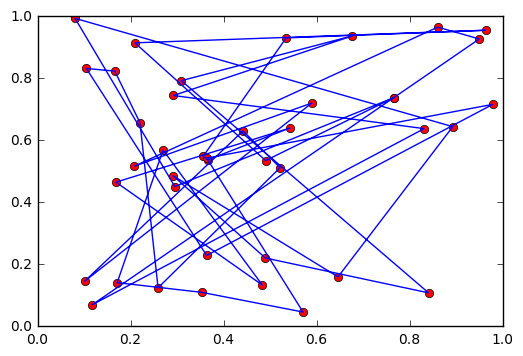

The starting distances is:  19.6108760175


In [9]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
#This for Notebook display
%matplotlib inline 

#Magnitude of a vector
def mag(rr): 
    return np.sqrt(rr[0]**2+rr[1]**2)

#Total Distance travelled
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

#Choose City Locations and make a plot

N=40
r=np.empty([N+1,2],float)
for i in range(N):
    r[i,0]=rnd.random()
    r[i,1]=rnd.random()
#This is so we can finish where we start. 
r[N]=r[0]

plt.plot(r[:,0],r[:,1],"ro")
plt.plot(r[:,0],r[:,1])
plt.show()

print("The starting distances is: ",distance())

Started at:  74.650676
Distance, Temperature 19.3598700567 39.99800005


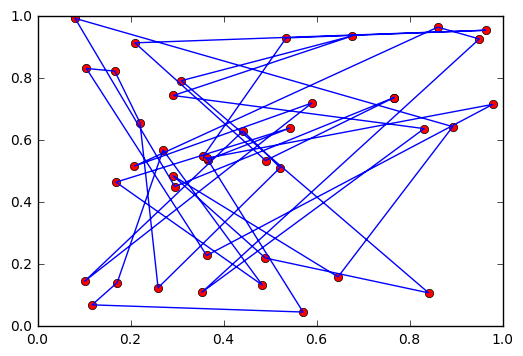

Distance, Temperature 18.3877480075 39.9960002


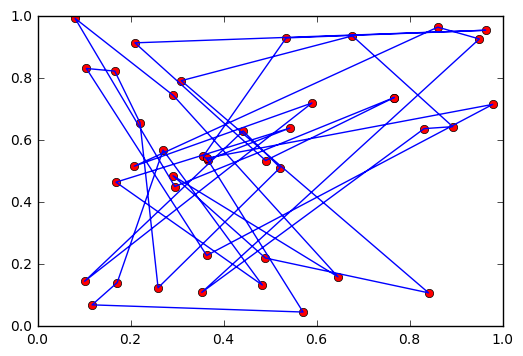

Distance, Temperature 17.9770495343 39.99400045


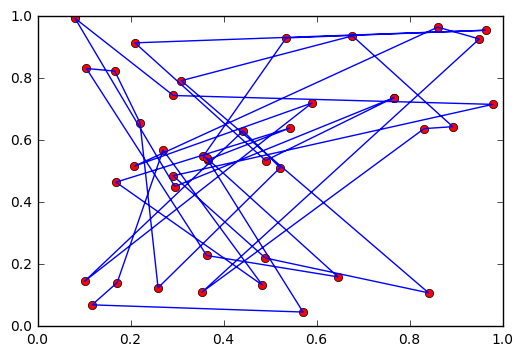

Distance, Temperature 17.556666707 39.9920007999


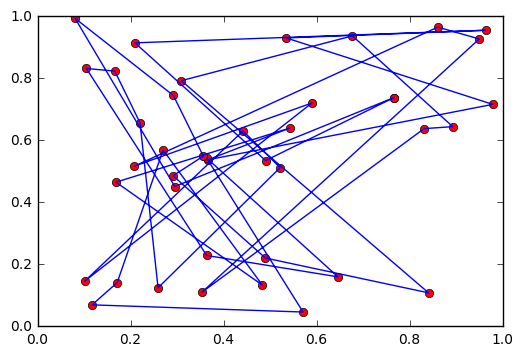

Distance, Temperature 17.9347928782 39.9900012499


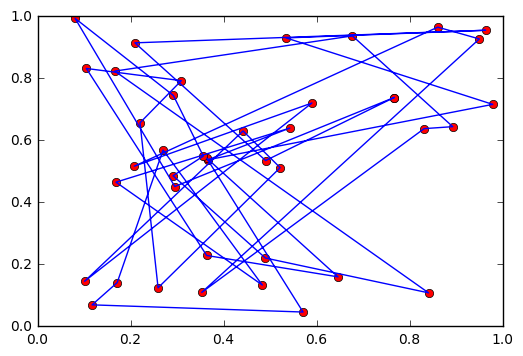

Distance, Temperature 17.9900798602 39.9880017998


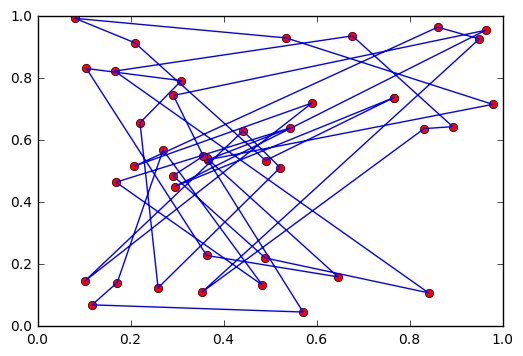

Distance, Temperature 18.147065284 39.9860024497


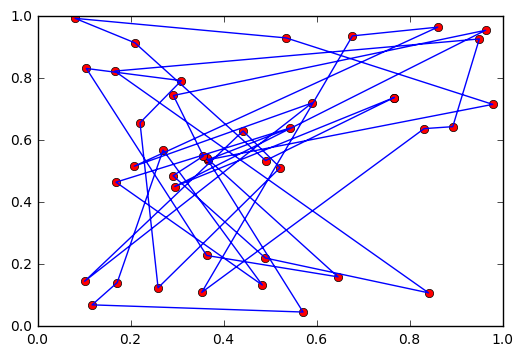

Distance, Temperature 17.9698521276 39.9840031996


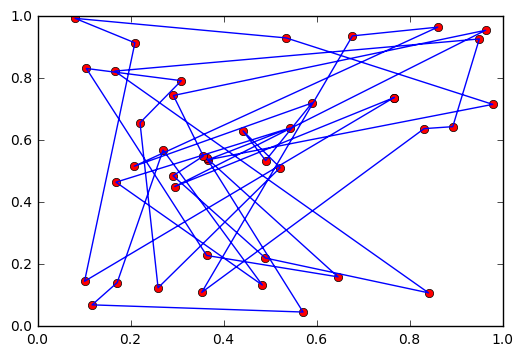

Distance, Temperature 18.3310810923 39.9820040494


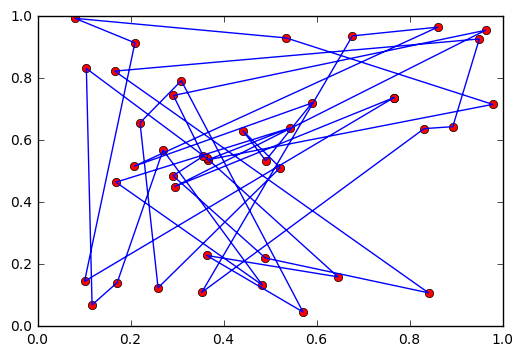

Distance, Temperature 19.5502443752 29.6327288273


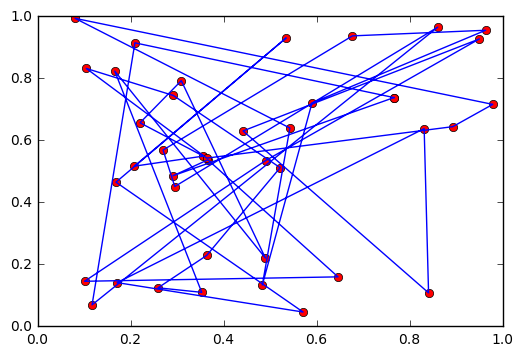

Distance, Temperature 20.9823138227 21.9524654438


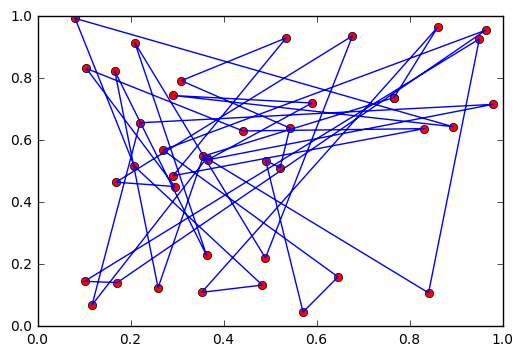

Distance, Temperature 21.7570500716 16.2627863896


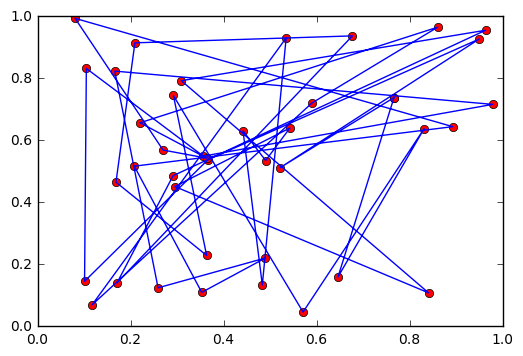

Distance, Temperature 20.5570648711 12.0477684765


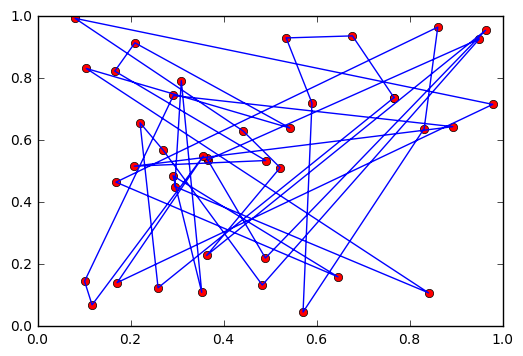

Distance, Temperature 19.0624416295 8.92520640594


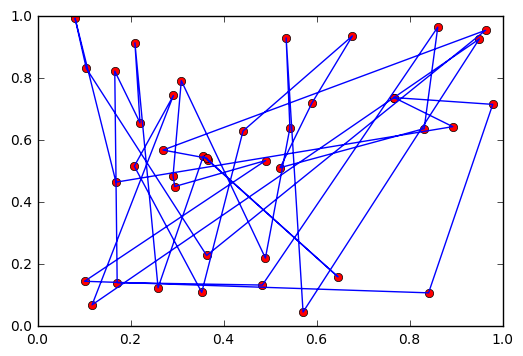

Distance, Temperature 21.3302854318 6.61195552886


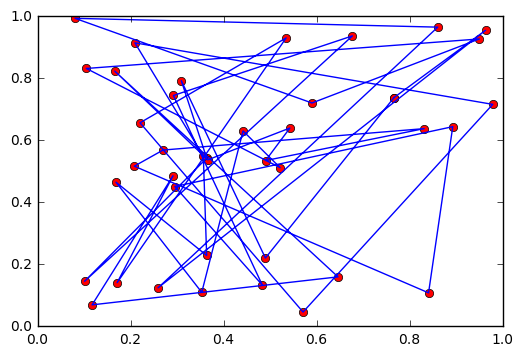

Distance, Temperature 20.6879493499 4.89825713012


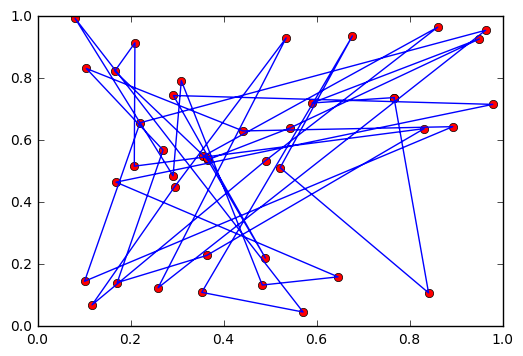

Distance, Temperature 18.8840893093 3.62871813158


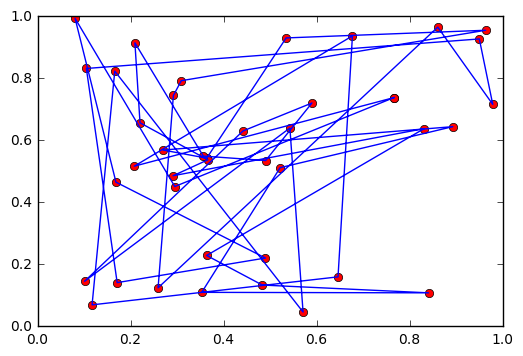

Distance, Temperature 20.349070436 2.68822050959


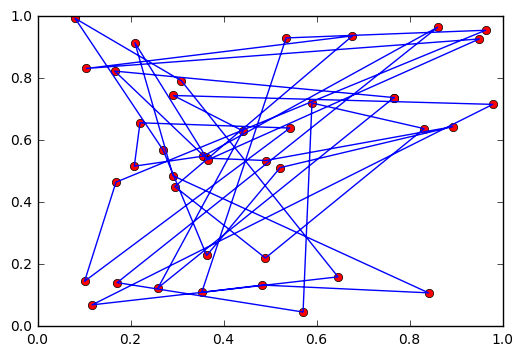

Distance, Temperature 19.5309658938 1.99148273471


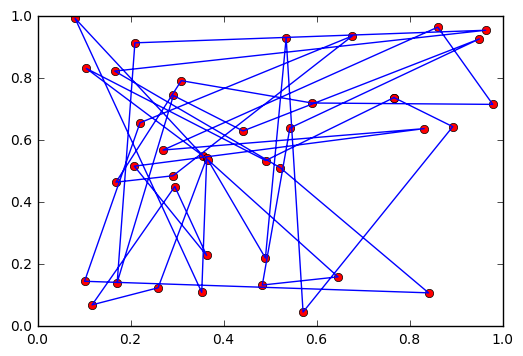

Distance, Temperature 19.6908720291 1.47532669605


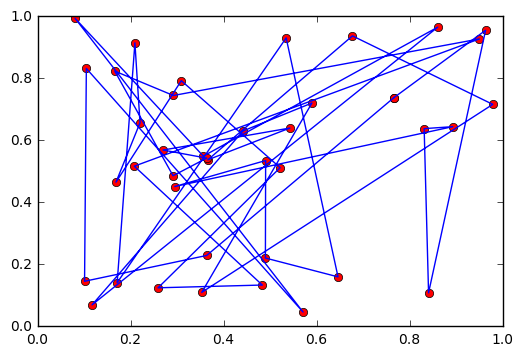

Distance, Temperature 18.7276225639 1.09294889789


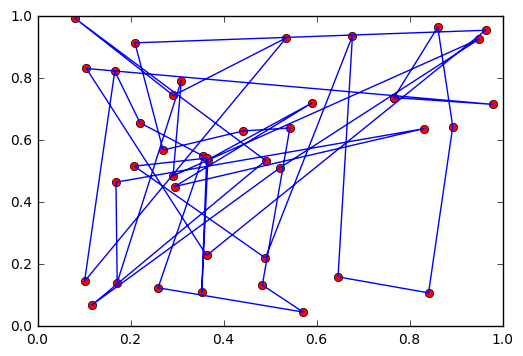

Distance, Temperature 14.9869561178 0.809676457832


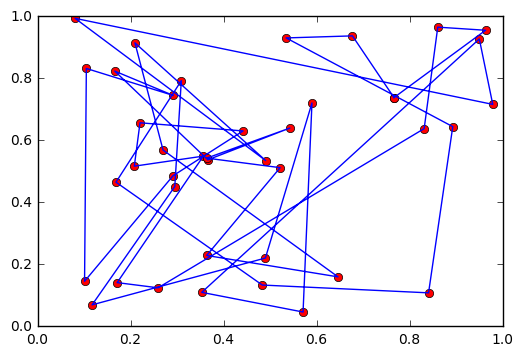

Distance, Temperature 15.1425084372 0.599823072819


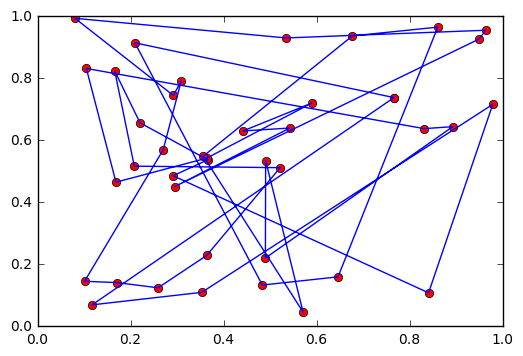

Distance, Temperature 16.066308305 0.44435986153


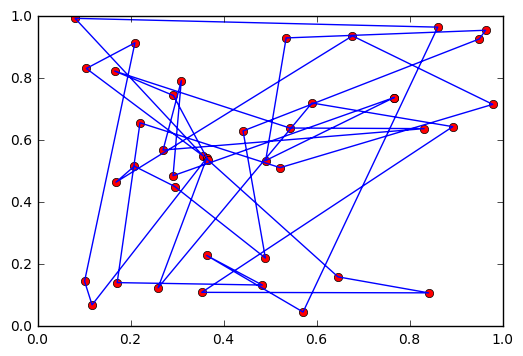

Distance, Temperature 15.9916536456 0.329189881961


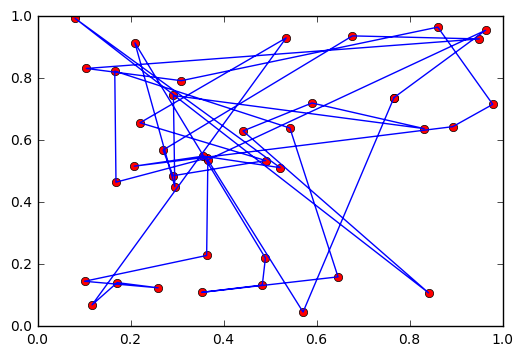

Distance, Temperature 13.5744299041 0.243869862621


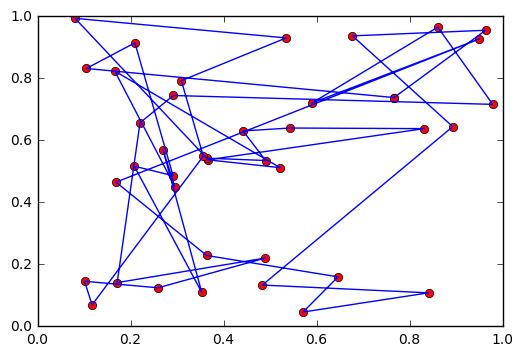

Distance, Temperature 11.6450628074 0.180663237705


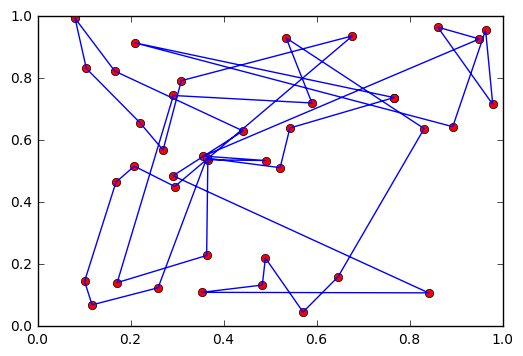

Distance, Temperature 10.815579111 0.133838618299


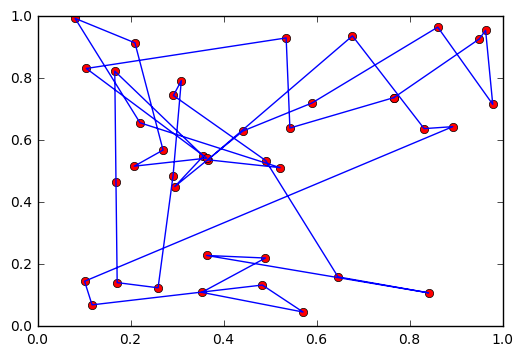

Distance, Temperature 8.97068997171 0.0991500870667


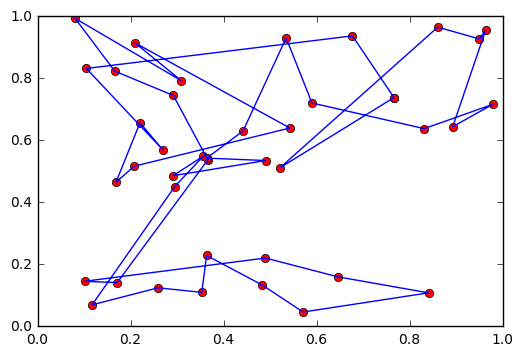

Distance, Temperature 7.23418290414 0.0734521910812


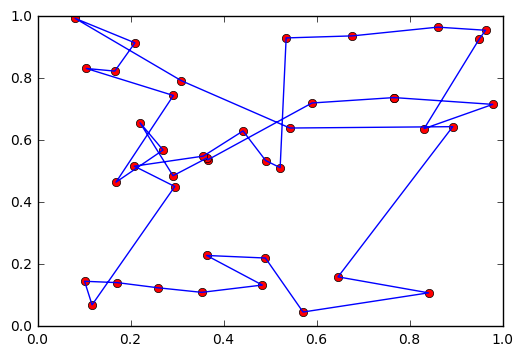

Distance, Temperature 5.93599096577 0.0544147215019


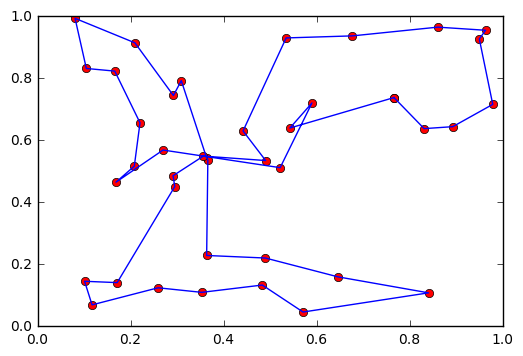

Distance, Temperature 5.98392645414 0.0403114171619


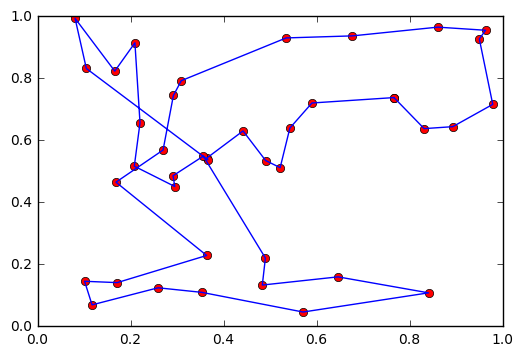

Distance, Temperature 5.43762183343 0.0298634323351


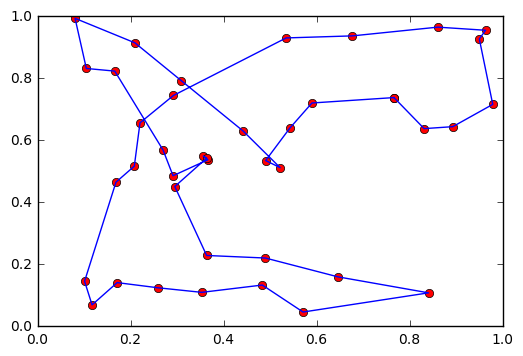

Distance, Temperature 5.55713048022 0.0221233748059


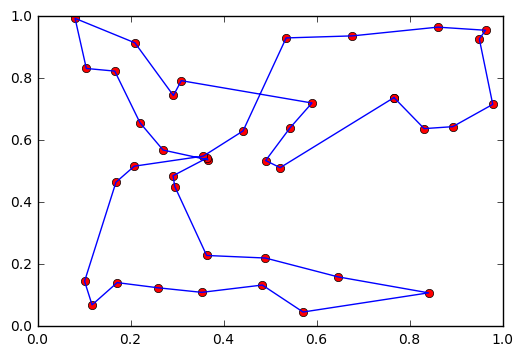

Distance, Temperature 5.54521586279 0.0163893991592


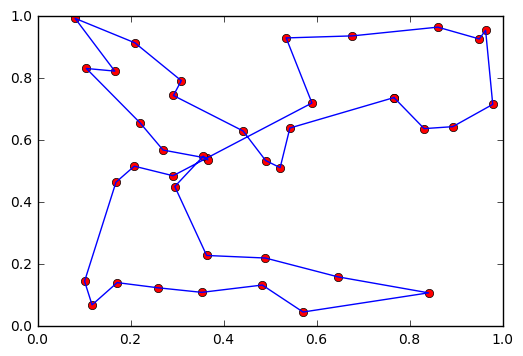

Distance, Temperature 5.52672435969 0.0121415655232


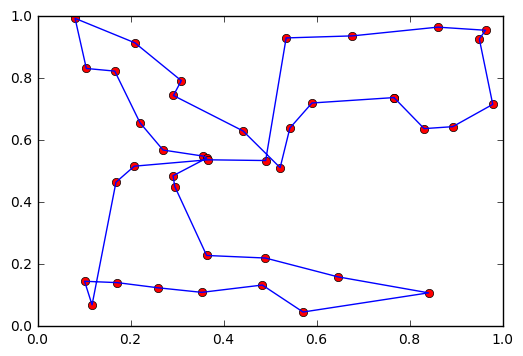

Distance, Temperature 5.33276170538 0.00899469296715


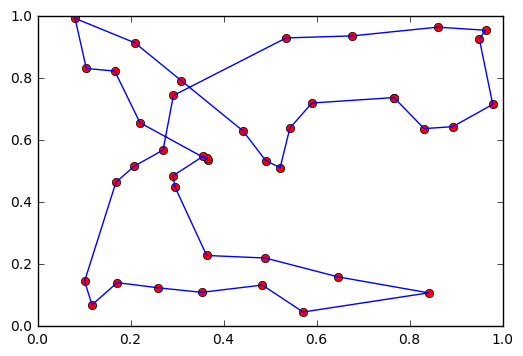

Distance, Temperature 5.31771080673 0.00666343243951


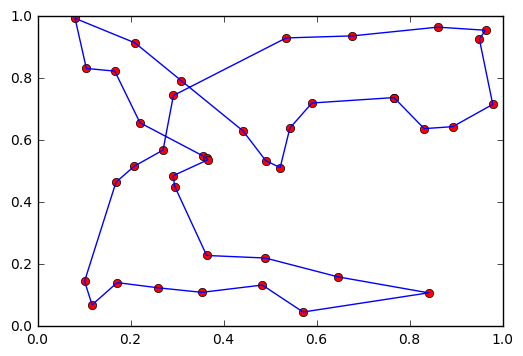

Distance, Temperature 5.31771080673 0.00493639216347


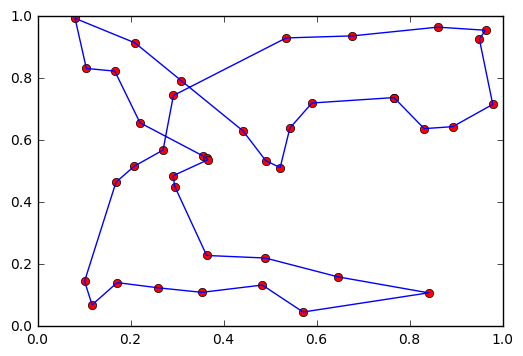

Distance, Temperature 5.32452462037 0.00365696925913


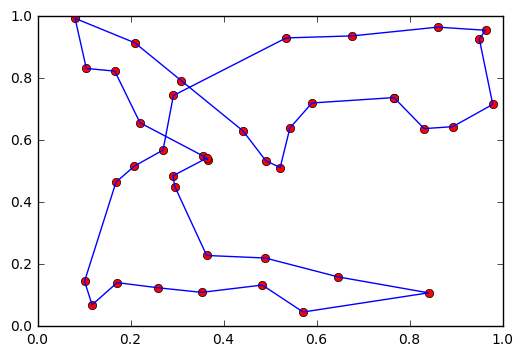

Distance, Temperature 5.31771080673 0.00270914945963


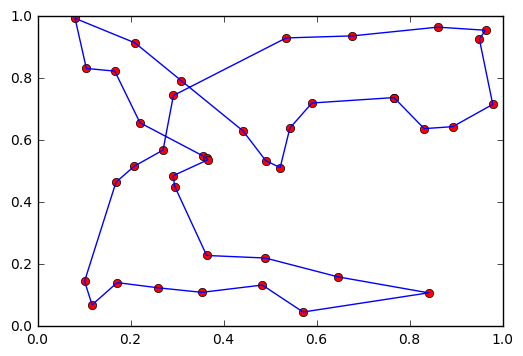

Distance, Temperature 5.31771080673 0.00200698728225


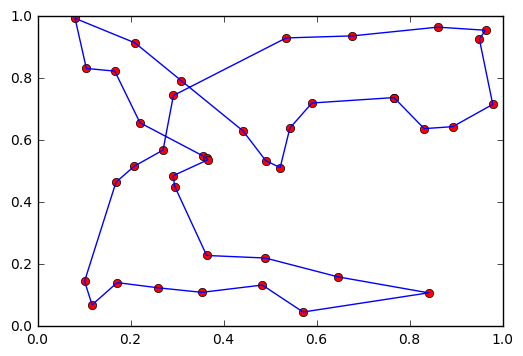

Distance, Temperature 5.31771080673 0.00148681274737


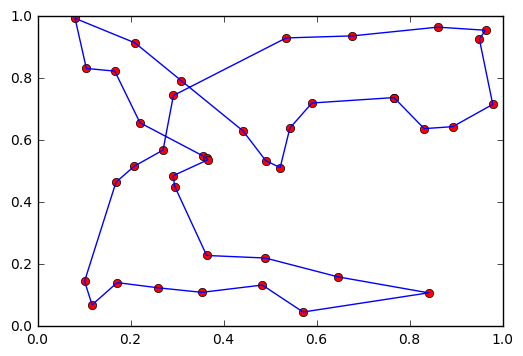

Distance, Temperature 5.31771080673 0.00110145797399


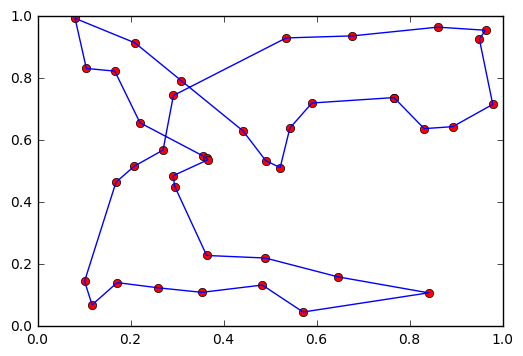

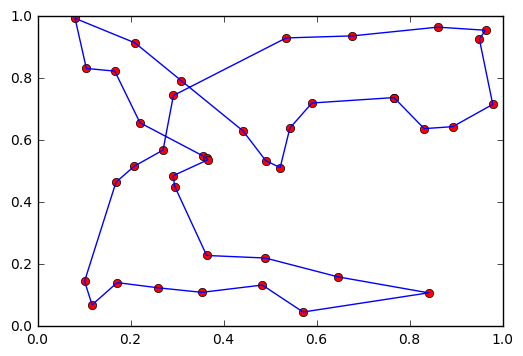

Finished at:  109.554428
Run time is:  34.903752 seconds


In [10]:
import time
start_time = time.clock()
print('Started at: ', start_time)

#Calculating starting distance
D = distance()
Tmax = 40.0
Tmin = 1e-3
tau = 2e4

#Main Loop
t = 0
T = Tmax
while T>Tmin:
    #Increment the time
    t+=1
    #Do the cooling step
    T = Tmax*np.exp(-t/tau)
            
    #Choose two locations to swap. Make sure they are not the same two locations! 
    i,j=rnd.randint(1,N),rnd.randint(1,N)
    while i==j:
        i,j=rnd.randint(1,N),rnd.randint(1,N)

    #Calculate new distance
    oldD = D
    r[i,0],r[j,0]=r[j,0],r[i,0]
    r[i,1],r[j,1]=r[j,1],r[i,1]
    D=distance()
    deltaD=D-oldD
    
    #Probability of rejecting the move
    if rnd.random()>np.exp(-deltaD/T):
            r[i,0],r[j,0]=r[j,0],r[i,0]
            r[i,1],r[j,1]=r[j,1],r[i,1]
            D=oldD
            
    #Output every some number of steps (plot or print)
    if (t<10):
        print("Distance, Temperature",D,T)
        plt.plot(r[:,0],r[:,1],"ro")
        plt.plot(r[:,0],r[:,1])
        plt.show()  
    if t%6000==0:
        print("Distance, Temperature",D,T)
        plt.plot(r[:,0],r[:,1],"ro")
        plt.plot(r[:,0],r[:,1])
        plt.show()        


#Final plot

plt.plot(r[:,0],r[:,1],"ro")
plt.plot(r[:,0],r[:,1])
plt.show()

finish=time.clock()
print("Finished at: ", finish )    
print("Run time is: ", finish - start_time, "seconds")
    